### Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/Module%205-%20Machine%20Learning%20Forecasting/Module5-DT_intuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
data.index = pd.to_datetime(data.index)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Making supervised ML data

In [3]:
test_period = 12
train_period = len(data) - test_period

print(f"Train period: {train_period}")
print(f"Test period: {test_period}")

Train period: 132
Test period: 12


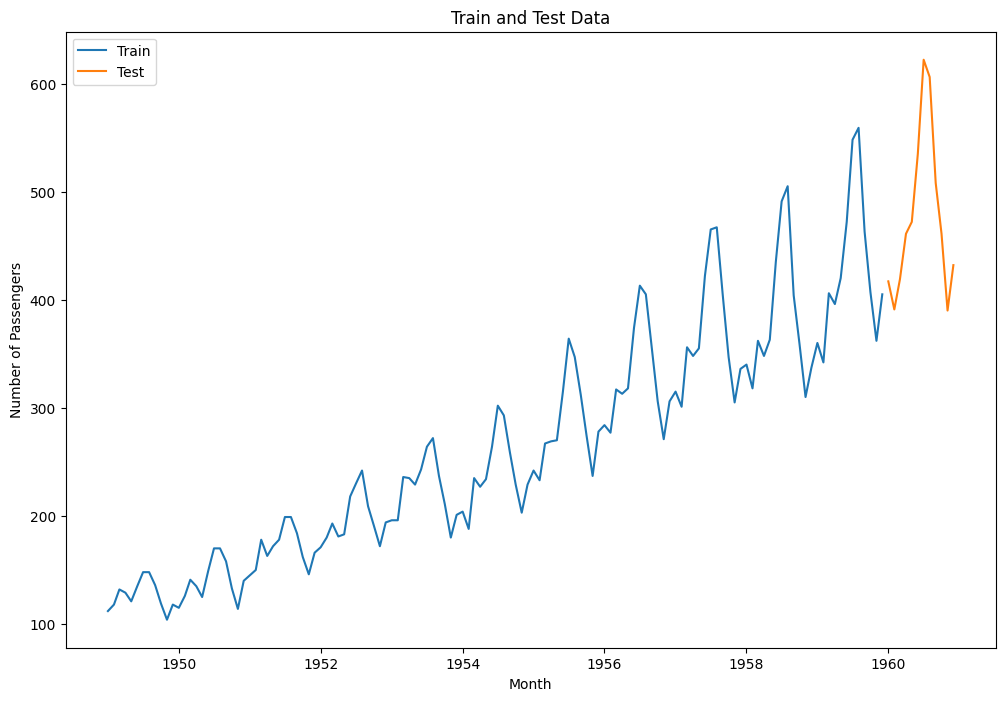

In [4]:
train = data.iloc[:train_period]
test = data.iloc[train_period:]

# plotting the train and test data with different colors
plt.figure(figsize=(12, 8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('Train and Test Data')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [5]:
train.index[-1]

Timestamp('1959-12-01 00:00:00')

In [6]:
# A Boolean series indicating which rows of the DataFrame data belong to each set (train, test)
train_indicator = (data.index <= train.index[-1])
test_indicator =  (data.index > train.index[-1])

test_indicator

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [7]:
# creating feature space X and target variable y for the training and test datasets
series = data['Passengers'].dropna().to_numpy()
series

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

In [8]:
len(series)

144

In [9]:
Tx = 2 # Number of lags! using the past Tx observations to forecast the next one.
Ty = 1 #  Forecasting Ty outputs at once
X = np.array([series[t:t+Tx] for t in range(len(series) - Tx-Ty+1)])
Y = np.array([series[t+Tx: t+Tx+Ty] for t in range(len(series) - Tx-Ty+1)])
N = len(X)

print("X:", X.shape, "Y:", Y.shape, "N:", N)

X: (142, 2) Y: (142, 1) N: 142


To understand it better, try a simple series = np.arange(7) with Tx=2 and Ty=1 and print X and Y


In [127]:
#series = np.arange(7)
#series

In [10]:
X

array([[112, 118],
       [118, 132],
       [132, 129],
       [129, 121],
       [121, 135],
       [135, 148],
       [148, 148],
       [148, 136],
       [136, 119],
       [119, 104],
       [104, 118],
       [118, 115],
       [115, 126],
       [126, 141],
       [141, 135],
       [135, 125],
       [125, 149],
       [149, 170],
       [170, 170],
       [170, 158],
       [158, 133],
       [133, 114],
       [114, 140],
       [140, 145],
       [145, 150],
       [150, 178],
       [178, 163],
       [163, 172],
       [172, 178],
       [178, 199],
       [199, 199],
       [199, 184],
       [184, 162],
       [162, 146],
       [146, 166],
       [166, 171],
       [171, 180],
       [180, 193],
       [193, 181],
       [181, 183],
       [183, 218],
       [218, 230],
       [230, 242],
       [242, 209],
       [209, 191],
       [191, 172],
       [172, 194],
       [194, 196],
       [196, 196],
       [196, 236],
       [236, 235],
       [235, 229],
       [229,

In [11]:
Y

array([[132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
       [229],
       [242],
      

In [12]:
X[:-test_period].shape

(130, 2)

In [14]:
X[-test_period:].shape

(12, 2)

In [15]:
Xtrain, Ytrain = X[:-test_period], Y[:-test_period]
Xtest, Ytest = X[-test_period:], Y[-test_period:]

# printing shapes
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(130, 2) (130, 1) (12, 2) (12, 1)


In [16]:
# training a simple decision tree model with depth 10
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

dt_model = DecisionTreeRegressor()
dt_model.fit(Xtrain, Ytrain)


DecisionTreeRegressor()

## One step ahead forecast

At each point in time (either in train or test set) we have access to the past Tx lags actual observations. 

In [17]:
train_indicator[:Tx] = False # the first Tx values are not predictable.
# because we need Tx lags to predict the next value

In [18]:
train_indicator

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [19]:
test_indicator

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [20]:
dt_1step_train_forcast = dt_model.predict(Xtrain)
dt_1step_test_forecast = dt_model.predict(Xtest)

In [21]:
dt_1step_train_forcast.shape

(130,)

In [22]:
dt_1step_test_forecast.shape

(12,)

In [23]:
dt_1step_test_forecast

array([396., 472., 347., 472., 467., 505., 559., 463., 463., 404., 404.,
       347.])

In [24]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [25]:
# plotting one step ahead forecast

data.loc[train_indicator, '1step_train_forecast'] = dt_1step_train_forcast
data.loc[test_indicator, '1step_test_forecast'] = dt_1step_test_forecast
data.head()

,Passengers,1step_train_forecast,1step_test_forecast
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,132.0,NaN
1949-04-01,129,129.0,NaN
1949-05-01,121,121.0,NaN


In [26]:
data.tail(13)

,Passengers,1step_train_forecast,1step_test_forecast
Month,,,
1959-12-01,405,405.0,NaN
1960-01-01,417,NaN,396.0
1960-02-01,391,NaN,472.0
1960-03-01,419,NaN,347.0
1960-04-01,461,NaN,472.0
1960-05-01,472,NaN,467.0
1960-06-01,535,NaN,505.0
1960-07-01,622,NaN,559.0
1960-08-01,606,NaN,463.0


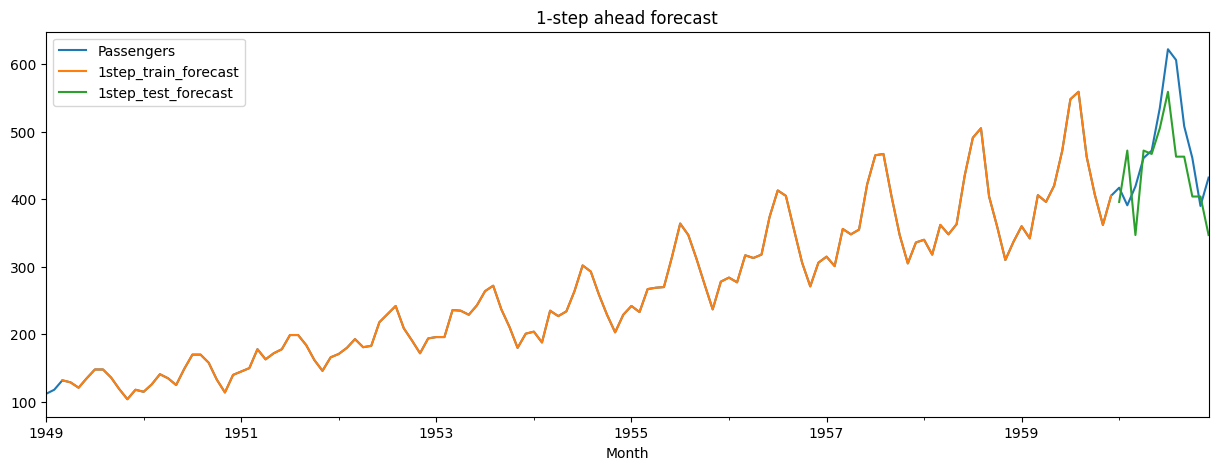

In [27]:
# plot 1-step forecast
data[['Passengers', '1step_train_forecast', '1step_test_forecast']].plot(figsize=(15, 5))
plt.title('1-step ahead forecast')
plt.show()


## Multi-step Forecast

At each point in time, we have access to the Tx lag observations only in the train set. For the test set however, we need to create the lag terms based on previous predictions, that's why we cannot use model.fit(X_test) for multi-step predictions. We need to generate a sequence of predictions for test_period steps into the future. 

These predictions can then be used to evaluate the performance of the model over this period.

In [28]:
Xtest

array([[362, 405],
       [405, 417],
       [417, 391],
       [391, 419],
       [419, 461],
       [461, 472],
       [472, 535],
       [535, 622],
       [622, 606],
       [606, 508],
       [508, 461],
       [461, 390]], dtype=int64)

In [29]:
Xtest.shape

(12, 2)

In [30]:
Xtest[0].shape

(2,)

In [31]:
Xtest[0].reshape(1, -1).shape

(1, 2)

In [32]:
train.tail()

,Passengers
Month,
1959-08-01,559
1959-09-01,463
1959-10-01,407
1959-11-01,362
1959-12-01,405


In [33]:
Xtest[0]

array([362, 405], dtype=int64)

In [34]:
input_X = Xtest[0]
prediction = dt_model.predict(input_X.reshape(1, -1))[0]
print(prediction)


396.0


In [35]:
test.head()

,Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472


In [36]:
input_X = np.roll(input_X, -1)
input_X[-1] = prediction
print(input_X)

[405 396]


In [37]:
multistep_predictions = []

# first test input
input_X = Xtest[0]

# Start a loop that will continue until we have the desired number of future forecasts (test_period).
while len(multistep_predictions) < test_period:
  prediction = dt_model.predict(input_X.reshape(1, -1))[0]
  
  # update the predictions list
  multistep_predictions.append(prediction)

  # update the new input
  # The input_X array, which serves as input for the next prediction, is updated. The np.roll(input_X, -1) shifts all elements of input_X one position to the left. 
  # The last element of last_x, which is now freed up, is filled with the last prediction p.
  input_X = np.roll(input_X, -1)
  input_X[-1] = prediction

In [39]:
multistep_predictions

[396.0,
 420.0,
 472.0,
 548.0,
 559.0,
 463.0,
 407.0,
 362.0,
 405.0,
 396.0,
 420.0,
 472.0]

In [40]:
# save multi-step forecast to dataframe
data.loc[test_indicator, 'multistep_test_forecast'] = multistep_predictions
data.tail()

,Passengers,1step_train_forecast,1step_test_forecast,multistep_test_forecast
Month,,,,
1960-08-01,606,NaN,463.0,362.0
1960-09-01,508,NaN,463.0,405.0
1960-10-01,461,NaN,404.0,396.0
1960-11-01,390,NaN,404.0,420.0
1960-12-01,432,NaN,347.0,472.0


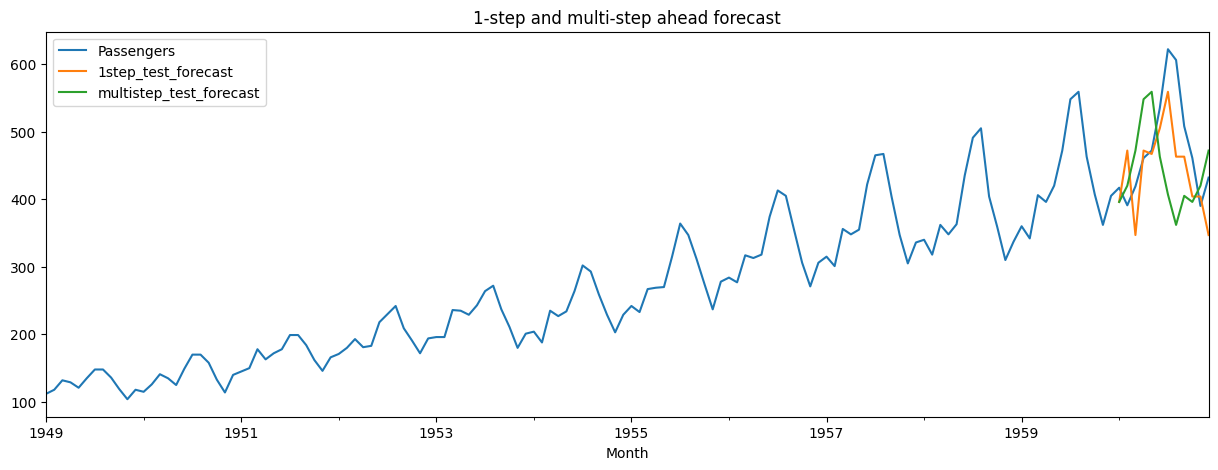

In [41]:
# plot 1-step and multi-step forecast
data[['Passengers', '1step_test_forecast', 'multistep_test_forecast']].plot(figsize=(15, 5))
plt.title('1-step and multi-step ahead forecast')
plt.show()


# Multi-output forecast 

In [42]:
# Make multi-output supervised dataset
Tx = 2 # recall: using the past Tx lag observations to forecast the next one.
Ty = test_period # number of outputs forecasted at once

# Create input-output pairs
X = np.array([series[t:t+Tx] for t in range(len(series) - Tx - Ty+1)])
Y = np.array([series[t+Tx:t+Tx+Ty] for t in range(len(series) - Tx - Ty+1)])
N = len(X)

print("X:", X.shape, "Y:", Y.shape, "N:", N)


X: (131, 2) Y: (131, 12) N: 131


In [43]:
series[0:14]

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126], dtype=int64)

In [44]:
X[0]

array([112, 118], dtype=int64)

In [45]:
Y[0]

array([132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126],
      dtype=int64)

In [46]:
X[:-1].shape

(130, 2)

In [47]:
Xtrain_mo, Ytrain_mo = X[:-1], Y[:-1] 
Xtest_mo, Ytest_mo = X[-1:], Y[-1:] # this is the last observation from data which we use to forecast the future

In [48]:
# print the shapes
print(Xtrain_mo.shape, Ytrain_mo.shape, Xtest_mo.shape, Ytest_mo.shape)

(130, 2) (130, 12) (1, 2) (1, 12)


In [49]:
multioutput_predictions_train = DecisionTreeRegressor().fit(Xtrain_mo, Ytrain_mo).predict(Xtrain_mo)
multioutput_predictions_test = DecisionTreeRegressor().fit(Xtrain_mo, Ytrain_mo).predict(Xtest_mo) # because we are forecasting multi-output at once, we can use the model.predict(X_test)

# printing the shapes
print(multioutput_predictions_train.shape, multioutput_predictions_test.shape)

(130, 12) (1, 12)


In [50]:
multioutput_predictions_test[0]

array([491., 505., 404., 359., 310., 337., 360., 342., 406., 396., 420.,
       472.])

In [51]:
# save multi-output forecast to dataframe
data.loc[test_indicator, 'multioutput_test_forecast'] = multioutput_predictions_test[0]
data.tail()

,Passengers,1step_train_forecast,1step_test_forecast,multistep_test_forecast,multioutput_test_forecast
Month,,,,,
1960-08-01,606,NaN,463.0,362.0,342.0
1960-09-01,508,NaN,463.0,405.0,406.0
1960-10-01,461,NaN,404.0,396.0,396.0
1960-11-01,390,NaN,404.0,420.0,420.0
1960-12-01,432,NaN,347.0,472.0,472.0


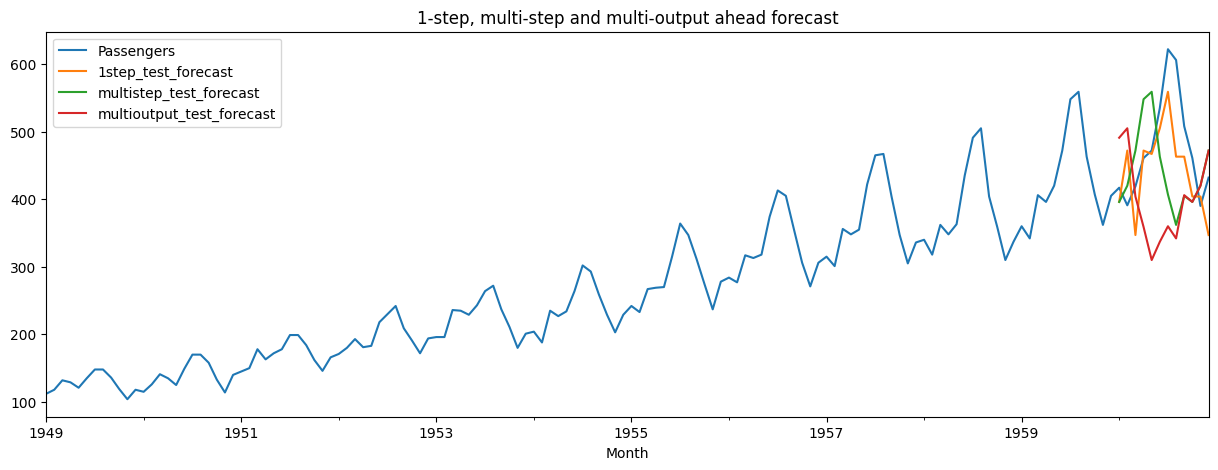

In [52]:
# plot 1-step and multi-step forecast along with multi-output forecast
data[['Passengers', '1step_test_forecast', 'multistep_test_forecast', 'multioutput_test_forecast' ]].plot(figsize=(15, 5))
plt.title('1-step, multi-step and multi-output ahead forecast')
plt.show()

# Forecast comparison

In [53]:
# MAPE
passenger_test = data.loc[test_indicator, 'Passengers']
mape1 = mean_absolute_percentage_error(passenger_test, data.loc[test_indicator, '1step_test_forecast'])
mape2 = mean_absolute_percentage_error(passenger_test, data.loc[test_indicator, 'multistep_test_forecast'])
mape3 = mean_absolute_percentage_error(passenger_test, data.loc[test_indicator, 'multioutput_test_forecast'])
print("1step_test MAE:", mape1)
print("multi-step MAE:", mape2)
print("multi-output MAE:", mape3)

1step_test MAE: 0.10850259161527497
multi-step MAE: 0.16835088645769006
multi-output MAE: 0.23396299343053814


## ML_ts_forecaster

In [54]:
# putting everything together for the one-step and multi-step forecasts in a function

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error


def ml_ts_forecaster(data, target, lags, fh, model, model_name):

    series = data[target].dropna().to_numpy()

    Tx = lags  
    Ty = 1 #  Forecasting Ty step ahead

    # Splitting the data
    test_period = fh
    train_period = len(data) - test_period
    train = data.iloc[:train_period]
    test = data.iloc[train_period:]

    # boolean series for train and test
    train_indicator = (data.index <= train.index[-1])
    test_indicator =  (data.index > train.index[-1])
    train_indicator[:Tx] = False # the first Tx values are not predictable.

    # making supervised data
    X = np.array([series[t:t+Tx] for t in range(len(series) - Tx-Ty+1)])
    Y = np.array([series[t+Tx+Ty-1] for t in range(len(series) - Tx-Ty+1)])
    Xtrain, Ytrain = X[:-test_period], Y[:-test_period]
    Xtest, Ytest = X[-test_period:], Y[-test_period:]

    # training the model
    model.fit(Xtrain, Ytrain)

    # one-step ahead forecast
    data.loc[train_indicator, f'{model_name}_1step_train_forecast'] = model.predict(Xtrain)
    data.loc[test_indicator, f'{model_name}_1step_test_forecast'] = model.predict(Xtest)

    # multi-step ahead forecast
    multistep_predictions = []
    input_X = Xtest[0]
    while len(multistep_predictions) < test_period:
        prediction = model.predict(input_X.reshape(1, -1))[0]
        multistep_predictions.append(prediction)
        input_X = np.roll(input_X, -1)
        input_X[-1] = prediction

    data.loc[test_indicator, f'{model_name}_multistep_test_forecast'] = multistep_predictions

    # MAPE comparison 
    mape_1step = mean_absolute_percentage_error(data.loc[test_indicator, target], data.loc[test_indicator, f'{model_name}_1step_test_forecast'])
    mape_multiple_step = mean_absolute_percentage_error(data.loc[test_indicator, target], data.loc[test_indicator, f'{model_name}_multistep_test_forecast'])
    print(f"{model_name} 1-step MAPE:", mape_1step)
    print(f"{model_name} multi-step MAPE:", mape_multiple_step)

    # plot 1-step and multi-step forecast
    data[[target, f'{model_name}_1step_test_forecast', f'{model_name}_multistep_test_forecast']].plot(figsize=(15, 5))
    plt.title('1-step and multi-step ahead forecast')
    plt.show()

    return data

dt 1-step MAPE: 0.057494093770281786
dt multi-step MAPE: 0.06568945086822175


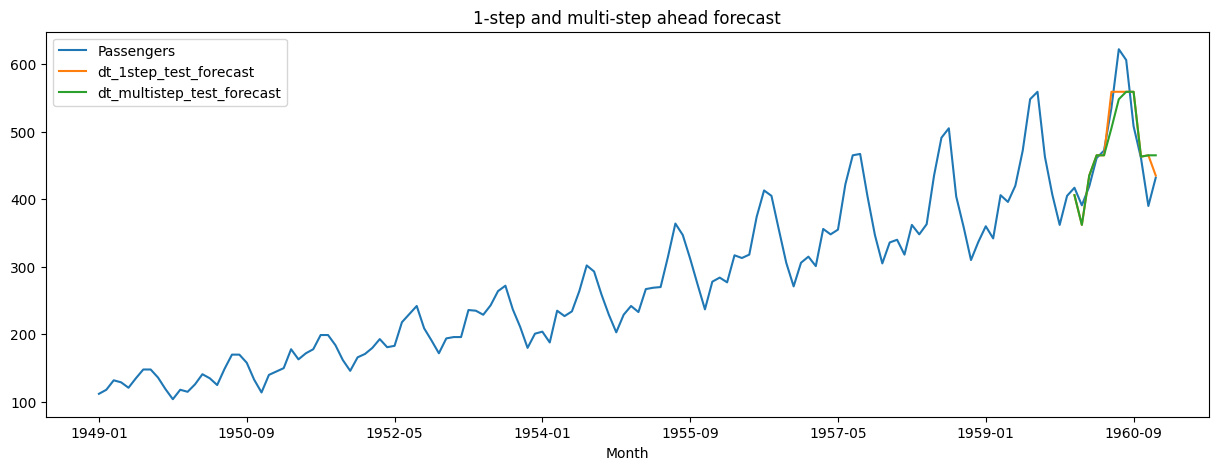

,Passengers,dt_1step_train_forecast,dt_1step_test_forecast,dt_multistep_test_forecast
Month,,,,
1949-01,112,NaN,NaN,NaN
1949-02,118,NaN,NaN,NaN
1949-03,132,NaN,NaN,NaN
1949-04,129,NaN,NaN,NaN
1949-05,121,NaN,NaN,NaN
...,...,...,...,...
1960-08,606,NaN,559.0,559.0
1960-09,508,NaN,559.0,559.0
1960-10,461,NaN,463.0,463.0


In [55]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
ml_ts_forecaster(data=df, target='Passengers', lags=12, fh=12, model = DecisionTreeRegressor(), model_name='dt')

lr 1-step MAPE: 0.037511349261051014
lr multi-step MAPE: 0.031428985575863495


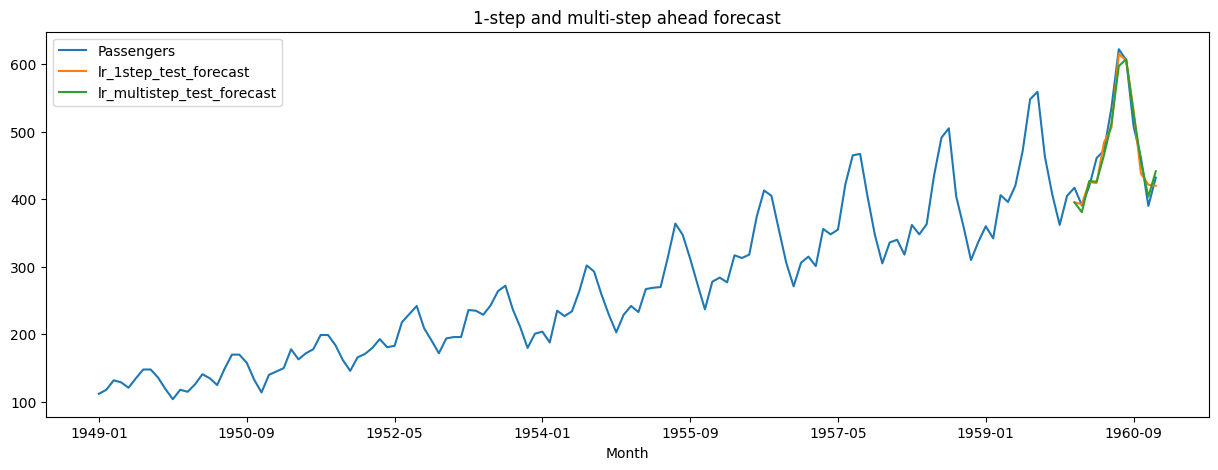

,Passengers,lr_1step_train_forecast,lr_1step_test_forecast,lr_multistep_test_forecast
Month,,,,
1949-01,112,NaN,NaN,NaN
1949-02,118,NaN,NaN,NaN
1949-03,132,NaN,NaN,NaN
1949-04,129,NaN,NaN,NaN
1949-05,121,NaN,NaN,NaN
...,...,...,...,...
1960-08,606,NaN,605.385382,607.170592
1960-09,508,NaN,531.731611,526.877273
1960-10,461,NaN,437.841621,455.721249


In [56]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
ml_ts_forecaster(data=df, target='Passengers', lags=12, fh=12, model = LinearRegression(), model_name='lr')

rf 1-step MAPE: 0.049522828238575324
rf multi-step MAPE: 0.05584006360424958


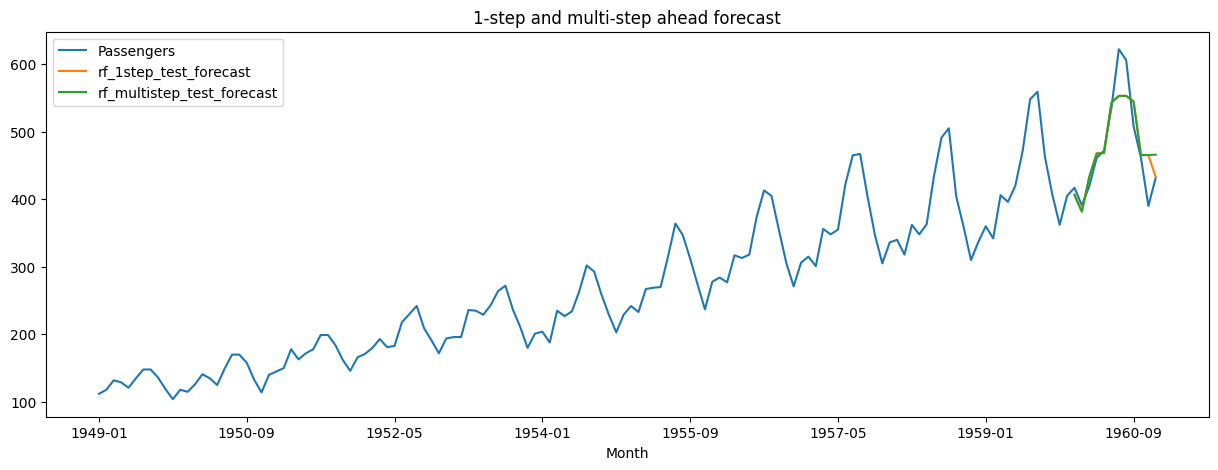

,Passengers,rf_1step_train_forecast,rf_1step_test_forecast,rf_multistep_test_forecast
Month,,,,
1949-01,112,NaN,NaN,NaN
1949-02,118,NaN,NaN,NaN
1949-03,132,NaN,NaN,NaN
1949-04,129,NaN,NaN,NaN
1949-05,121,NaN,NaN,NaN
...,...,...,...,...
1960-08,606,NaN,552.95,552.95
1960-09,508,NaN,544.64,544.64
1960-10,461,NaN,465.48,465.20


In [57]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
ml_ts_forecaster(data=df, target='Passengers', lags=12, fh=12, model = RandomForestRegressor(bootstrap=False), model_name='rf')

rf 1-step MAPE: 0.007812026610203801
rf multi-step MAPE: 0.00780959920515754


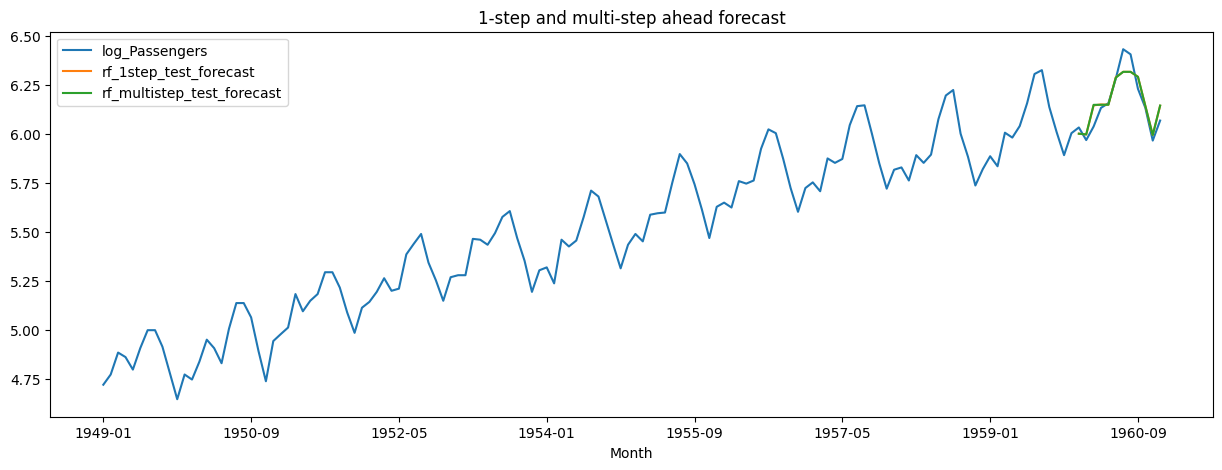

,Passengers,log_Passengers,rf_1step_train_forecast,rf_1step_test_forecast,rf_multistep_test_forecast
Month,,,,,
1949-01,112,4.718499,NaN,NaN,NaN
1949-02,118,4.770685,NaN,NaN,NaN
1949-03,132,4.882802,NaN,NaN,NaN
1949-04,129,4.859812,NaN,NaN,NaN
1949-05,121,4.795791,NaN,NaN,NaN
...,...,...,...,...,...
1960-08,606,6.406880,NaN,6.317405,6.317405
1960-09,508,6.230481,NaN,6.291839,6.291839
1960-10,461,6.133398,NaN,6.142696,6.142094


In [58]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
df['log_Passengers'] = np.log(df['Passengers'])
ml_ts_forecaster(data=df, target='log_Passengers', lags=12, fh=12, model = RandomForestRegressor(bootstrap=False), model_name='rf')

KNN 1-step MAPE: 0.12878913190362845
KNN multi-step MAPE: 0.12001244980641906


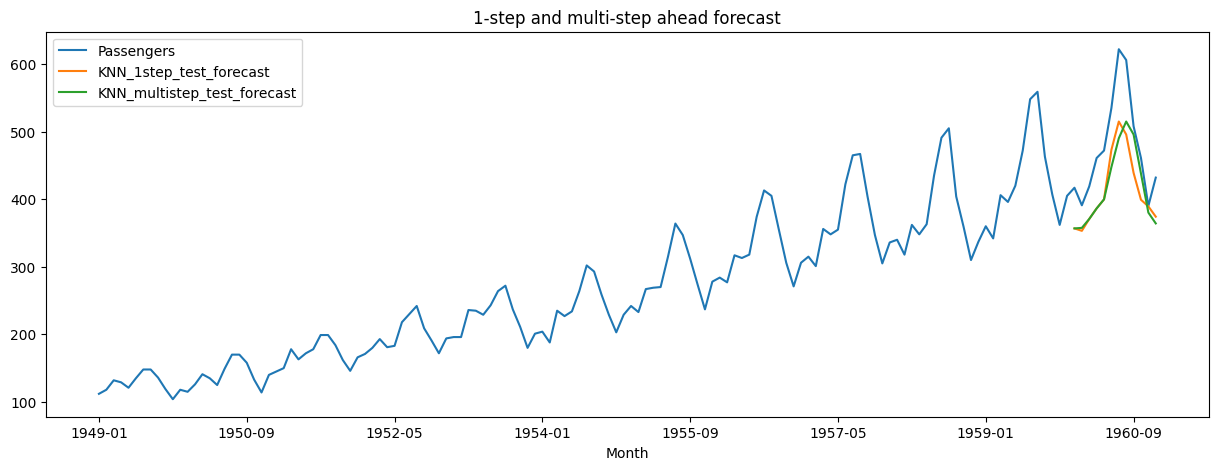

,Passengers,KNN_1step_train_forecast,KNN_1step_test_forecast,KNN_multistep_test_forecast
Month,,,,
1949-01,112,NaN,NaN,NaN
1949-02,118,NaN,NaN,NaN
1949-03,132,NaN,NaN,NaN
1949-04,129,NaN,NaN,NaN
1949-05,121,NaN,NaN,NaN
...,...,...,...,...
1960-08,606,NaN,495.8,515.0
1960-09,508,NaN,439.0,495.8
1960-10,461,NaN,399.2,438.4


In [59]:
# KNN regressor 
from sklearn.neighbors import KNeighborsRegressor

df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
ml_ts_forecaster(data=df, target='Passengers', lags=12, fh=12, model = KNeighborsRegressor(), model_name='KNN')

# PyCaret

In [60]:
# Now let's do pycaret

df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
df.index = pd.to_datetime(df.index).to_period('M')

from pycaret.time_series import *
exp = TSForecastingExperiment()

exp.setup(data = df, session_id = 100, fh = 12, target = 'Passengers')

,Description,Value
0,session_id,100
1,Target,Passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [61]:
exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.5852,0.6105,17.1926,20.1634,0.0435,0.0439,0.8918,0.5533
ets,ETS,0.5933,0.6214,17.4235,20.5165,0.0440,0.0445,0.8881,0.5700
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6637,0.7167,19.5897,23.7251,0.0488,0.0487,0.8496,0.1433
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.6813,0.7866,20.0334,25.9670,0.0491,0.0499,0.8113,0.1567
arima,ARIMA,0.6830,0.6735,20.0069,22.2199,0.0501,0.0507,0.8677,0.5533
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.7004,0.7702,20.6084,25.4401,0.0509,0.0514,0.8215,0.1533
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.7004,0.7703,20.6086,25.4405,0.0509,0.0514,0.8215,0.1500
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.7029,0.7732,20.6816,25.5362,0.0511,0.0516,0.8201,0.1567
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.7048,0.7751,20.7373,25.6005,0.0512,0.0517,0.8193,0.1533
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.7048,0.7751,20.7366,25.6009,0.0512,0.0517,0.8192,0.1533


ExponentialSmoothing(seasonal='mul', sp=12, trend='add')

### Important note: 
ML models in Pycaret are using 10 lags by default. we need to update that number. 



In [63]:
from sktime.transformations.series.summarize import WindowSummarizer

# Define 12 lags
kwargs = {"lag_feature": {"lag": list(range(1, 13))}}
fe_target_rr = [WindowSummarizer(n_jobs=1, truncate="bfill", **kwargs)]

# Setup with custom lags
exp2 = TSForecastingExperiment()
exp2.setup(data=df, fh=12, target = 'Passengers', fe_target_rr=fe_target_rr, session_id=100)

,Description,Value
0,session_id,100
1,Target,Passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [73]:
# creating random forest model
rf = exp.create_model('rf_cds_dt', cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.8060,0.8854,24.5417,30.5900,0.0481,0.0495,0.8311


In [74]:
# creating random forest model
rf2 = exp2.create_model('rf_cds_dt', cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.8118,0.8990,24.7196,31.0580,0.0483,0.0497,0.8259


Notice this MAPE is close to what we got from:

* ml_ts_forecaster(data=df, target='Passengers', lags=12, fh=12, model = RandomForestRegressor(bootstrap=False), model_name='rf')

Using sklearn, we didn't deseasonalize the data but we used more lags to capture that seasonality. 

In [75]:
tuned_rf = exp.tune_model(rf, optimize = 'MAPE')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.5015,0.5913,14.6463,19.3540,0.0363,0.0373,0.8781
1,1957-12,0.8548,0.8678,26.1330,29.4620,0.0733,0.0700,0.7726
2,1958-12,0.4542,0.5544,12.9791,18.0225,0.0282,0.0286,0.9273
Mean,NaT,0.6035,0.6712,17.9195,22.2795,0.0459,0.0453,0.8593
SD,NaT,0.1787,0.1399,5.8476,5.1078,0.0196,0.0178,0.0645


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.9s finished


In [76]:
tuned_rf2 = exp2.tune_model(rf2, optimize = 'MAPE')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.5022,0.5899,14.6660,19.3107,0.0364,0.0373,0.8786
1,1957-12,0.8576,0.8699,26.2188,29.5320,0.0735,0.0702,0.7715
2,1958-12,0.4517,0.5522,12.9064,17.9504,0.0280,0.0284,0.9279
Mean,NaT,0.6038,0.6707,17.9304,22.2644,0.0460,0.0453,0.8594
SD,NaT,0.1806,0.1417,5.9047,5.1689,0.0198,0.0180,0.0653


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


In [77]:
exp.plot_model(tuned_rf, plot = 'forecast', data_kwargs={'fh':24})

# Done!